In [1]:
## 코렙 드라이브 마운트합니다.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/data/img

/content/drive/MyDrive/data/img


In [4]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9679 sha256=19e9cf4cc1fdc7c63a798588a930feb97ce962fcb5efed95c901c588538f6130
  Stored in directory: c:\users\dq\appdata\local\pip\cache\wheels\bd\a8\c3\3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [6]:
import os
import zipfile
import wget
# 개 고양이 이미지 자료 다운로드
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
out_path='data/tmp/'
wget.download(url, out=out_path)



'data/tmp//cats_and_dogs_filtered.zip'

In [7]:
# 현재작업폴더 하위의 tmp폴더에 있는 zip 파일 압축해제
local_zip = 'data/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('data/tmp')
zip_ref.close()

print('--end---')


# 작업경로 설정

#-----------기본경로
base_dir = 'data/tmp/cats_and_dogs_filtered'

# 기본경로+폴더명 작성  (폴더명을 os.listdir 로 가져와서 작업해도 됨)
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

print('end')


--end---
end


In [8]:
train_cats_fnames = os.listdir(train_cats_dir)
train_dogs_fnames = os.listdir(train_dogs_dir)
test_cats_fnames = os.listdir(validation_cats_dir)
test_dogs_fnames = os.listdir(validation_dogs_dir)

In [9]:
# 데이터의 편향 확인

# train데이터의 고양이와 강아지의 사진수 확인
print(len(train_cats_fnames), len(train_dogs_fnames))

# 검증용 데이터의 고양이와 강아지 사진의 수 확인
print(len(test_cats_fnames), len(test_dogs_fnames))

1000 1000
500 500


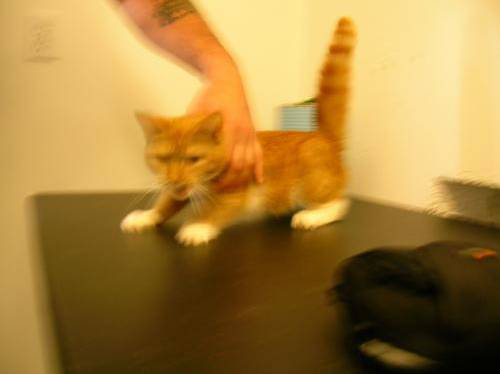

In [10]:
# 샘플사진 확인
# 이미지 읽고/출력

sample = train_cats_dir+'/'+train_cats_fnames[0]
from PIL import Image
Image.open(sample)


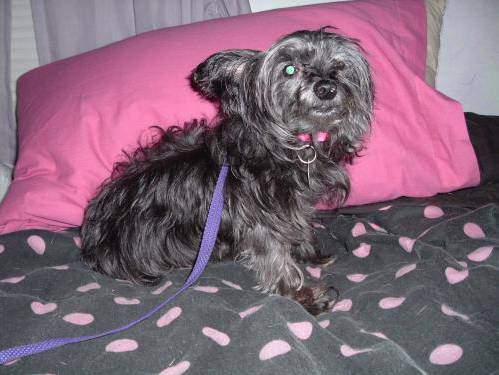

In [11]:
# 샘플사진 확인
# 이미지 읽고/출력

sample = train_dogs_dir+'/'+train_dogs_fnames[0]
from PIL import Image
Image.open(sample)


In [12]:
## 텐서플로우의 이미지제너레이터를 이용해서 데이터를 스케일링 함
# 이작업에서는 사진의 회전, 확대 등 증강 기술들이 사용되게 됨
# 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255) # 이미지 스케일링
test_datagen = ImageDataGenerator(rescale=1./255) # 이미지 스케일링

# 이미지 제너레이터 자료는 모델 fit 할때 입력하는 훈련자료와 테스트자료에 사용함

In [13]:
# train_generator 는 스케일링 된 자료나 증강된 자료를 이용해야 함
# 훈련과 테스트(val)자료를 폴더단위로 배치만큼만 읽으며서  x, y값의 형태를 제작
# 폴더안의 파일 단위로 넘파이의 array를 append하고 폴더가 바뀌면 리스트 추가해서 다시 append함
# 2개의 폴더가 있어서 (2, 20, 150, 150, 3) shape이 나옴
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    target_size=(150,150),
                                                    class_mode='binary')

test_generator = train_datagen.flow_from_directory(validation_dir,
                                                    batch_size=20,
                                                    target_size=(150,150),
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
import numpy as np
import matplotlib.pyplot as plt

train_generator[0][0]
len(train_generator) # 트레이닝 전체자료는 2000개중 배치사이즈 20으로 나뉘어서 100개로 나옴
len(test_generator) # 1000/20 = 50개

50

In [15]:
# 사진이미지 pixcel값
# train_generator[0][0][0], train_generator[0][0][1], train_generator[0][0][2], train_generator[0][0][3]
# train_genrator[0][0] : 이미지 값
# 개, 고양이 레이블 값
train_generator[0][1] # cat은 1, dog는 1로 고양이와 개의 bool값

len(train_generator[0][1]) # cat는 0, dog는 1로 고양이와 개의 bool값

len(train_generator) # 전체 배치단위로 나옴

# train_generator 에는 [0] ~ [99] 까지의 100개의 배치 자료가 있음
# train_generator[0][0][0] => 0번째 배치(0~19)의 사진중 사진 이미지를 가지고 있는 array의 첫번재 사진
# train_generator[0][1][0] => 0번째 배치(0~19)의 사진중 레이블 이미지를 가지고 있는 array의 첫번재 레이블 값

# train_generator[1][0][0] => 1번째 배치(20~39)의 사진중 사진 이미지를 가지고 있는 array의 첫번재 사진


100

In [16]:
len(train_generator[0][0])

20

In [17]:
train_generator[0][1][0]
# [배치(2000/20=100)][레이블값(개인지 고양이인지 정답)][사진이미지]

1.0

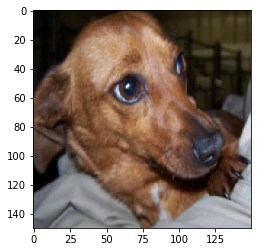

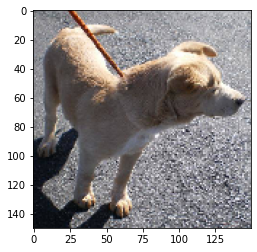

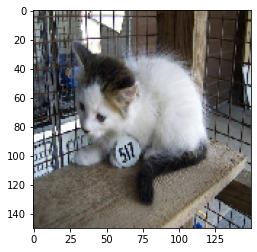

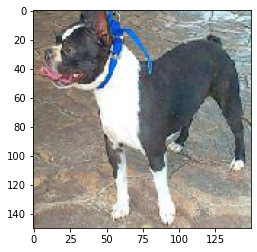

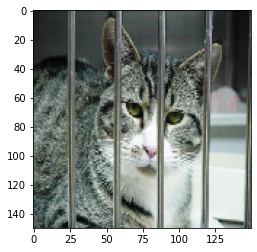

In [18]:
np.shape(train_generator[0][0][0])

for i in range(5):
  plt.imshow(train_generator[0][0][i])
  plt.show()

In [19]:
# 모델 구축
# -- 파람계산 공식
# 첫번째 Param 계산공식 ((필터*필터)*채널수(input수)*유닛수) + 바이어스수(유닛수)
# 두번째 Param 계산공식 ((필터*필터)*인풋수*유닛수 )+바이어스수(유닛수)

# -- output shape 계산 공식 ((input shape수 - 필터 + 2 * 패딩수) /스트라이드수) + 1
# 스트라이드 수는 필터가 이동하는 칸
# 첫번째 model.add (150-3+2*0)/1+1
# 두번째 model.add (74-3+2*0)/1+1
# 세번째 (72-3+2*0)/1+1

from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), # 필터 : 무작위의 값을 갖는 3*3(9개의 픽셀), 9개의 픽셀이 각 이미지의 각 픽셀과 곱셈함
                        activation='relu', input_shape=(150,150,3))) # 즉 3*3 필터가 3개의 채널을 모두 계산해야 함. w값이 (3*3)*3*32 +32 = 896개의 param 이 됨
model.add(layers.MaxPool2D((2,2))) # 아웃풋 값을 반으로 줄여줌
model.add(layers.Conv2D(64,(3,3), activation='relu')) # (3*3*32*64)+64
model.add(layers.Conv2D(128,(3,3), activation='relu')) # (3*3*64*128)+128

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 70, 70, 128)       73856     
Total params: 93,248
Trainable params: 93,248
Non-trainable params: 0
_________________________________________________________________


In [21]:
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))   
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())   # 7*7*128=6272
model.add(layers.Dense(512, activation='relu'))  
model.add(layers.Dense(1, activation='sigmoid'))


In [22]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100, 
      epochs=30,
      validation_data=test_generator,
      validation_steps=50)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 24s 201ms/step - loss: 0.6888 - acc: 0.5390 - val_loss: 0.6697 - val_acc: 0.6130
Epoch 2/30
100/100 [==============================] - 7s 73ms/step - loss: 0.6605 - acc: 0.6025 - val_loss: 0.6421 - val_acc: 0.5950
Epoch 3/30
100/100 [==============================] - 8s 75ms/step - loss: 0.6115 - acc: 0.6650 - val_loss: 0.6378 - val_acc: 0.6160
Epoch 4/30
100/100 [==============================] - 7s 70ms/step - loss: 0.5656 - acc: 0.7060 - val_loss: 0.6009 - val_acc: 0.6670
Epoch 5/30
100/100 [==============================] - 7s 66ms/step - loss: 0.5412 - acc: 0.7220 - val_loss: 0.5577 - val_acc: 0.7130
Epoch 6/30
100/100 [==============================] - 7s 70ms/step - loss: 0.5151 - acc: 0.7510 - val_loss: 0.5842 - val_acc: 0.6930
Epoch 7/30
100/100 [==============================] - 7s 67ms/step - loss: 0.4876 - acc: 0.7550 - val_loss: 0.6035 - val_acc: 0.6770
Epoch 8/30
100/100 [==============================] - 7s 66ms/step 

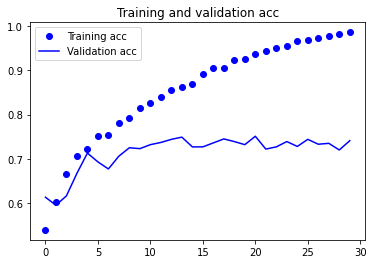

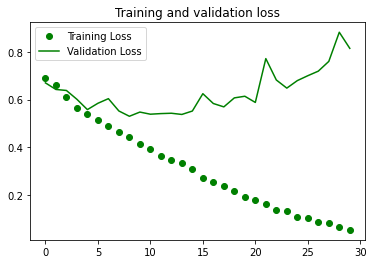

In [23]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
# import numpy as np
# from google.colab import files
# from keras.preprocessing import image

# def pred():
#   uploaded=files.upload()

#   for fn in uploaded.keys():

#     path='/content/' + fn
#     img=image.load_img(path, target_size=(150, 150))

#     x=image.img_to_array(img)
#     x=np.expand_dims(x, axis=0)
#     images = np.vstack([x])

#     classes = model.predict(images, batch_size=10)

#     print(classes[0])

#     if classes[0]>0:
#       print(fn + " 사진은 강아지 입니다.")
#     else:
#       print(fn + " 사진은 고양이 입니다.")

In [27]:
# -------------------이미지 어그멘테이션
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range= 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest') 
# fill_mode에는 'constant', 'nearest', 'reflect', 'wrap'
validation_datagen = ImageDataGenerator(rescale=1./255) 

In [28]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20, # batch_size는 한번 flow_from_directory가 실행 될 때 생성할 이미지 수
                                                    target_size=(150,150),#크기
                                                    class_mode = 'binary')# 0 or 1로 labelling

Found 2000 images belonging to 2 classes.


In [29]:
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              batch_size=20,
                                                              target_size=(150,150),
                                                              class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [30]:
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 128)      

In [32]:
x=[0.00001, 0.000002, 0.000003, 0.999992, 0.000003]
np.argmax(x)

3

In [33]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [34]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 15s 146ms/step - loss: 0.6937 - acc: 0.5310 - val_loss: 0.6838 - val_acc: 0.5040
Epoch 2/30
100/100 [==============================] - 14s 138ms/step - loss: 0.6805 - acc: 0.5550 - val_loss: 0.6626 - val_acc: 0.6030
Epoch 3/30
100/100 [==============================] - 14s 136ms/step - loss: 0.6661 - acc: 0.5960 - val_loss: 0.6877 - val_acc: 0.5360
Epoch 4/30
100/100 [==============================] - 14s 137ms/step - loss: 0.6544 - acc: 0.6100 - val_loss: 0.6123 - val_acc: 0.6660
Epoch 5/30
100/100 [==============================] - 14s 139ms/step - loss: 0.6261 - acc: 0.6415 - val_loss: 0.6385 - val_acc: 0.6320
Epoch 6/30
100/100 [==============================] - 14s 139ms/step - loss: 0.6219 - acc: 0.6520 - val_loss: 0.6334 - val_acc: 0.6400
Epoch 7/30
100/100 [==============================] - 14s 137ms/step - loss: 0.6110 - acc: 0.6580 - val_loss: 0.5507 - val_acc: 0.7170
Epoch 8/30
100/100 [==============================] - 1

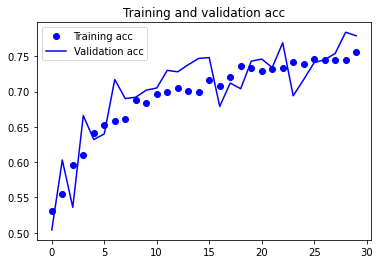

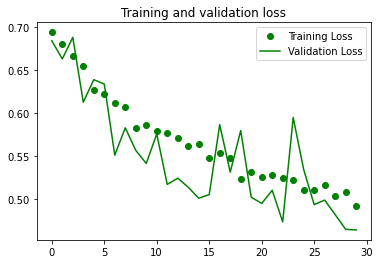

In [36]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [38]:
from keras.preprocessing import image

def pred(path):      
    img = image.load_img(path, target_size=(150, 150))

    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = model.predict(images, batch_size=10)

    print(classes[0])

    if classes[0]>0:
        print(path + " 사진은 강아지 입니다.")
    else:
        print(path + " 사진은 고양이 입니다.")

In [39]:
pred('data/tmp/dog1.jpg')

[1.]
data/tmp/dog1.jpg 사진은 강아지 입니다.


In [40]:
pred('data/tmp/cat1.jpg')

[5.8410095e-12]
data/tmp/cat1.jpg 사진은 강아지 입니다.


In [41]:
pred('data/tmp/cat2.jpg')

[1.]
data/tmp/cat2.jpg 사진은 강아지 입니다.


In [42]:
pred('data/tmp/cat3.jpg')

[1.]
data/tmp/cat3.jpg 사진은 강아지 입니다.


In [43]:
pred('data/tmp/cat4.jpg')

[1.]
data/tmp/cat4.jpg 사진은 강아지 입니다.


In [44]:
pred('data/tmp/cat5.jpg')

[0.99999595]
data/tmp/cat5.jpg 사진은 강아지 입니다.


In [45]:
#----------------------------------------------
# VGG16
# -------------------이미지 어그멘테이션
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range= 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest') 
# fill_mode에는 'constant', 'nearest', 'reflect', 'wrap'
test_datagen = ImageDataGenerator(rescale=1./255) 

In [46]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    target_size=(150,150),
                                                    class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [47]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                      batch_size=20,
                                                      target_size=(150,150),
                                                      class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [51]:
from keras.applications.vgg16 import VGG16

VGG16_model = VGG16(weights='imagenet',
                    include_top=False,
                    input_shape=(150, 150, 3))

In [52]:
VGG16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [53]:
last_layer = VGG16_model.get_layer('block5_pool')
print('last layer output shape: ', last_layer.output.shape)

last layer output shape:  (None, 4, 4, 512)


In [54]:
last_output = last_layer.output

In [55]:
last_output

<KerasTensor: shape=(None, 4, 4, 512) dtype=float32 (created by layer 'block5_pool')>

In [56]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

x = layers.Flatten()(last_output)


x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(VGG16_model.input, x)

model.compile(optimizer=RMSprop(lr=0.0001),
            loss='binary_crossentropy',
            metrics=['acc'])

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [57]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [58]:
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  steps_per_epoch=100,
  epochs=20,
  validation_steps=50
)

Epoch 1/20
100/100 [==============================] - 23s 190ms/step - loss: 0.8710 - acc: 0.5140 - val_loss: 0.6928 - val_acc: 0.5000
Epoch 2/20
100/100 [==============================] - 19s 188ms/step - loss: 0.7055 - acc: 0.4980 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 3/20
100/100 [==============================] - 19s 188ms/step - loss: 0.6932 - acc: 0.4850 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 4/20
100/100 [==============================] - 19s 189ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 5/20
100/100 [==============================] - 19s 188ms/step - loss: 0.6932 - acc: 0.4910 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 6/20
100/100 [==============================] - 19s 187ms/step - loss: 0.6932 - acc: 0.4850 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 7/20
100/100 [==============================] - 19s 186ms/step - loss: 0.6932 - acc: 0.4830 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 8/20
100/100 [==============================] - 1

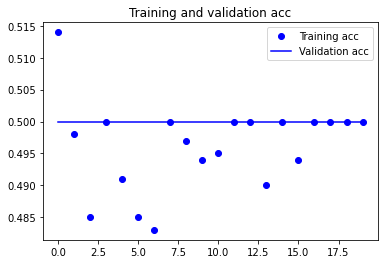

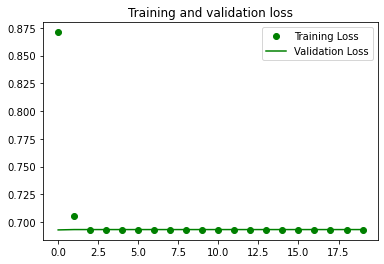

In [59]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [61]:
for i in range(1, 6):
    pred(f'data/tmp/cat{i}.jpg')

[0.49985638]
data/tmp/cat1.jpg 사진은 강아지 입니다.
[0.49985638]
data/tmp/cat2.jpg 사진은 강아지 입니다.
[0.49985638]
data/tmp/cat3.jpg 사진은 강아지 입니다.
[0.49985638]
data/tmp/cat4.jpg 사진은 강아지 입니다.
[0.49985638]
data/tmp/cat5.jpg 사진은 강아지 입니다.


In [62]:
pred('data/tmp/dog1.jpg')

[0.49985638]
data/tmp/dog1.jpg 사진은 강아지 입니다.


In [63]:
from keras.applications.vgg16 import VGG16

# 이전 모든 예제에서는 최상단의 완전 연결 분류기를 제외했지만 여기서는 포함합니다
v_model = VGG16(weights='imagenet')

553476096/553467096 [==============================] - 10s 0us/step


In [65]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# 이미지 경로
img_path = 'data/tmp/cat1.jpg'

# 224 × 224 크기의 파이썬 이미징 라이브러리(PIL) 객체로 반환됩니다
img = image.load_img(img_path, target_size=(224, 224))

# (224, 224, 3) 크기의 넘파이 float32 배열
x = image.img_to_array(img)

# 차원을 추가하여 (1, 224, 224, 3) 크기의 배치로 배열을 변환합니다
x = np.expand_dims(x, axis=0)

# 데이터를 전처리합니다(채널별 컬러 정규화를 수행합니다)
x = preprocess_input(x)

In [66]:
preds = v_model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

49152/35363 [=========================================] - 0s 0us/step
Predicted: [('n02123045', 'tabby', 0.6110592), ('n02124075', 'Egyptian_cat', 0.19213954), ('n02123159', 'tiger_cat', 0.15950362)]


In [73]:
for i in range(1, 6):
    # 이미지 경로
    img_path = f'data/tmp/cat{i}.jpg'

    # 224 × 224 크기의 파이썬 이미징 라이브러리(PIL) 객체로 반환됩니다
    img = image.load_img(img_path, target_size=(224, 224))

    # (224, 224, 3) 크기의 넘파이 float32 배열
    x = image.img_to_array(img)

    # 차원을 추가하여 (1, 224, 224, 3) 크기의 배치로 배열을 변환합니다
    x = np.expand_dims(x, axis=0)

    # 데이터를 전처리합니다(채널별 컬러 정규화를 수행합니다)
    x = preprocess_input(x)
    preds = v_model.predict(x)
    print('Predicted:',img_path.split('/')[-1] ,decode_predictions(preds, top=3)[0][0][1:])

Predicted: cat1.jpg ('tabby', 0.6110592)
Predicted: cat2.jpg ('tabby', 0.39563978)
Predicted: cat3.jpg ('tabby', 0.2867146)
Predicted: cat4.jpg ('basenji', 0.5926989)
Predicted: cat5.jpg ('Egyptian_cat', 0.31121892)


In [74]:
model.save('data/tmp/dog_cat_VGG16.h5') # 저장